In [1]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from utils import squeezed_log_transform, preprocess_agreement_score_dataset, squeezed_logit_transform, \
    inverse_logit_transform, SORTER_NAMES

In [2]:
data_path = '/home/mclancy/truespikes/data/static_tetrode_dataset.hd5'

transformations = {'firing_rate': squeezed_log_transform,
                   'presence_ratio': lambda x: x == 1,
                   'd_prime': squeezed_log_transform,
                   'nn_hit_rate': squeezed_logit_transform,
                   'nn_miss_rate': squeezed_logit_transform,
                   'silhouette_score': squeezed_log_transform,
                   'l_ratio': lambda x: x,
                   'snr': squeezed_log_transform,
                   'agreement_score': squeezed_logit_transform,
                   'sorterName': lambda x: x
                   }

data = preprocess_agreement_score_dataset(data_path, transform_dict=transformations)

sorter_idx = data[['sorterName']].applymap(lambda x: SORTER_NAMES.index(str(x).lower()))
data.drop(columns=['sorterName'], inplace=True)

In [3]:
train_data, test_data = train_test_split(data,
    shuffle=True, test_size=0.2, stratify=sorter_idx
)

In [4]:
X_train = train_data.drop(columns='agreement_score')
y_train = train_data['agreement_score']
X_test = test_data.drop(columns='agreement_score')
y_test = test_data['agreement_score']

standard_scalar = StandardScaler()
X_train = standard_scalar.fit_transform(X_train)
X_test = standard_scalar.transform(X_test)

In [5]:
# Model with parameters unchanged

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [6]:
y_preds = model.predict(X_test)

In [7]:
rmse = np.sqrt(mean_squared_error(inverse_logit_transform(y_preds), inverse_logit_transform(y_test)))


In [8]:
rescaled_y_preds = inverse_logit_transform(y_preds)
rescaled_y_test = inverse_logit_transform(y_test)

/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agreement_score'>

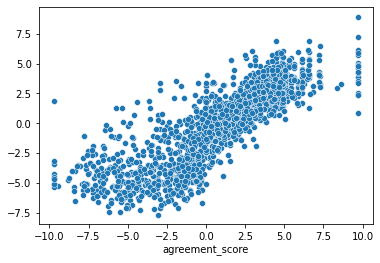

In [9]:
sns.scatterplot(y_test, y_preds)

<AxesSubplot:ylabel='Count'>

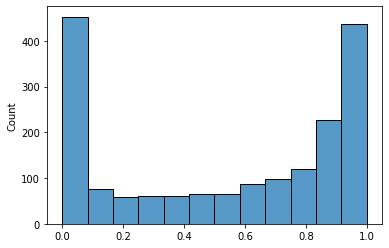

In [10]:
sns.histplot(rescaled_y_preds)

<AxesSubplot:xlabel='agreement_score', ylabel='Count'>

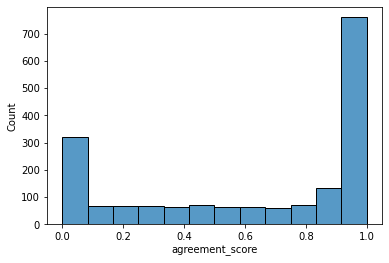

In [11]:
sns.histplot(rescaled_y_test)

In [12]:
fp_preds = rescaled_y_preds >= 0.5
fp_test = rescaled_y_test >= 0.5

In [13]:
f1_score(fp_preds, fp_test)

0.8911253430924062

In [14]:
accuracy_score(fp_preds, fp_test)

0.8684355997788834

In [15]:
import matplotlib.pyplot as plt

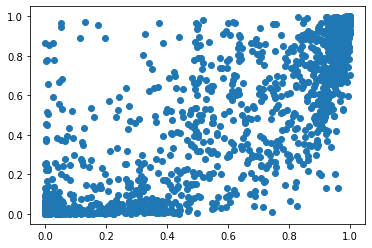

In [16]:
plt.scatter(rescaled_y_test, rescaled_y_preds)
plt.savefig('correlation_agreement_predicted_vs_true.pdf')

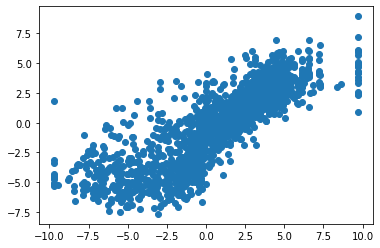

In [17]:
plt.scatter(y_test, y_preds)
plt.savefig('correlation_agreement_predicted_vs_true_logit.pdf')